<a href="https://colab.research.google.com/github/Nithee5h/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries (if needed)
!pip install seaborn --quiet

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Settings
sns.set(style='whitegrid')


In [4]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (1).csv


In [6]:
import pandas as pd

# Load the CSV file (make sure you've uploaded the file)
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

# Preview the dataset
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
# Check for missing values
df.isnull().sum()

# Drop missing values (or you can impute)
df.dropna(inplace=True)

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'TotalAmount' column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# View cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   TotalAmount  406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [10]:
# Numerical summary
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,406829.000000,406829,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,427.591718


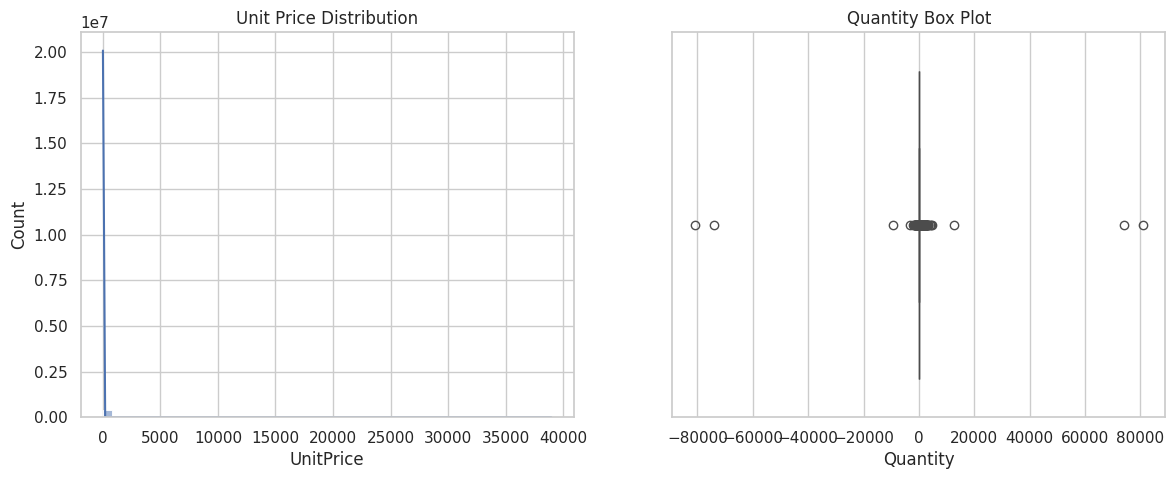

In [11]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title("Unit Price Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Quantity'])
plt.title("Quantity Box Plot")
plt.show()


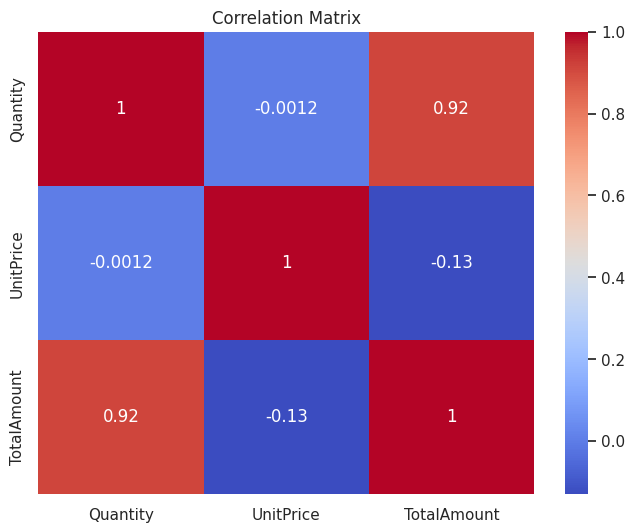

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalAmount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


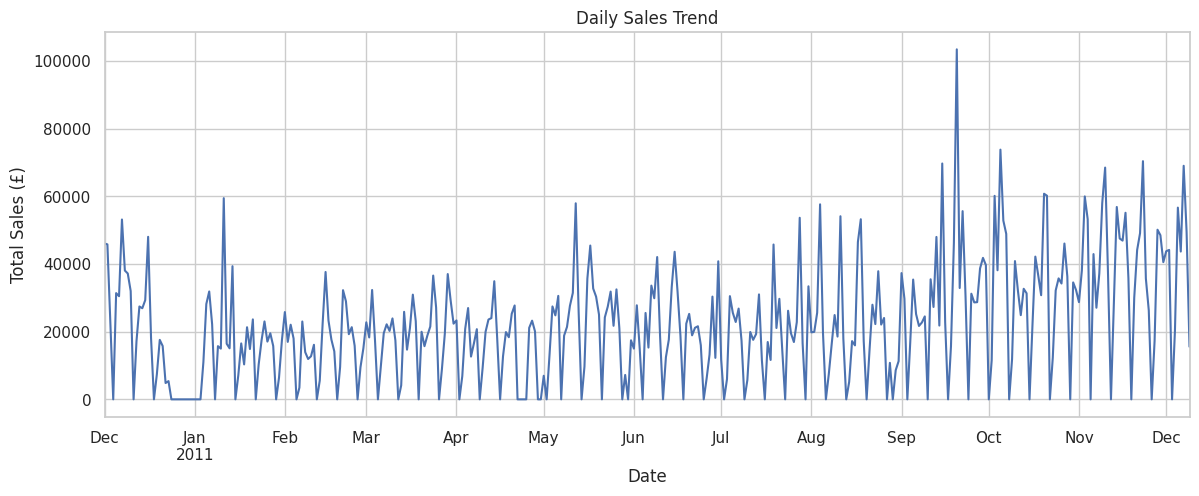

In [13]:
df.set_index('InvoiceDate')['TotalAmount'].resample('D').sum().plot(figsize=(14, 5))
plt.title("Daily Sales Trend")
plt.ylabel("Total Sales (£)")
plt.xlabel("Date")
plt.show()


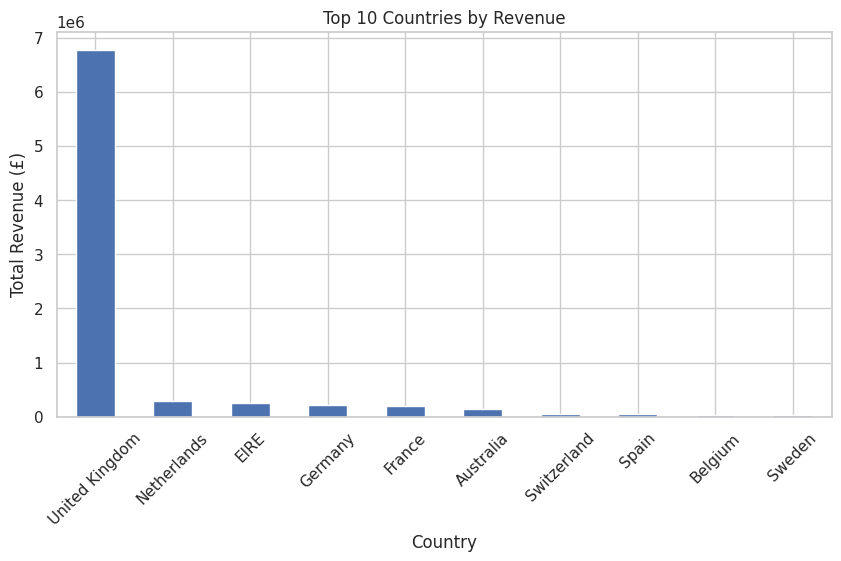

In [14]:
df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Total Revenue (£)")
plt.xticks(rotation=45)
plt.show()


In [15]:
print("Top-selling country (excluding UK):",
      df[df['Country'] != 'United Kingdom']['Country'].value_counts().idxmax())

print("Top customer (by total amount spent):")
print(df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(1))

print("Most popular product (by sales volume):")
print(df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(1))


Top-selling country (excluding UK): Germany
Top customer (by total amount spent):
CustomerID
14646.0    279489.02
Name: TotalAmount, dtype: float64
Most popular product (by sales volume):
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53215
Name: Quantity, dtype: int64
